In [2]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pymysql
import warnings
warnings.filterwarnings("ignore")
from functools import reduce
warnings.filterwarnings("ignore")
pd.set_option('display.max_column', None)
dbcon = pymysql.connect(host="localhost",user= "root",password= "Volksvagen@121",database= "hr_portfolio")

In [3]:
# !pip install SQLAlchemy
df=pd.read_sql_query("select * from consolidated_search_ds;", dbcon)

In [4]:
df.head()

,Job Title,Company,Area,Employer Email,Employer Contact Number,Salary,Lower Salary Range,Upper Salary Range,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,None,None,Not Specified,NaN,NaN,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,-1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,None,['3955 8549'],Not Specified,NaN,NaN,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3.0,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,None,['2827 8322'],Not Specified,NaN,NaN,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1.0,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,None,None,Not Specified,NaN,NaN,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2.0,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,10-21-2021,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,None,None,HK$17K - 25K /month,17.0,25.0,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,10-22-2021,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN


In [5]:
df.shape

(3211, 30)

In [6]:
df.isnull().any()

Job Title                  False
Company                    False
Area                       False
Employer Email              True
Employer Contact Number     True
Salary                     False
Lower Salary Range          True
Upper Salary Range          True
Job Highlights             False
Job Description            False
Career Level               False
Qualification              False
Years of Experience        False
Job Type                   False
Company Website            False
Job Link                   False
Job Functions              False
Industry                   False
Search Term                False
Date Posted                False
Date Scraped               False
Data Source                False
jobtick_avgsalary           True
jobtick_SQL                 True
jobtick_Excel               True
jobtick_dashboard           True
jobtick_Python              True
jobtick_engineerjobs        True
jobtick_analystjobs         True
jobtick_scientistjobs       True
dtype: boo

In [7]:
df[df['Data Source']=='JobsDB']

,Job Title,Company,Area,Employer Email,Employer Contact Number,Salary,Lower Salary Range,Upper Salary Range,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,None,None,Not Specified,NaN,NaN,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,-1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,None,['3955 8549'],Not Specified,NaN,NaN,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3.0,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,None,['2827 8322'],Not Specified,NaN,NaN,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1.0,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,None,None,Not Specified,NaN,NaN,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2.0,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,10-21-2021,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,None,None,HK$17K - 25K /month,17.0,25.0,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,10-22-2021,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,Azure Developer,Capgemini Hong Kong Limited,Not Specified,None,None,Not Specified,NaN,NaN,"['Azure Development', 'Javascript, Jquery, Ang...","['Job Role:', 'As an Azure developer, you will...",Entry,Not Specified,-1.0,"Full Time, Permanent, Contract",Not Specified,/hk/en/job/azure-developer-100003008777691,"Information Technology (IT), Software Development",Information Technology,Business Intelligence,09-29-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3164,"Senior Marketing & Communications Executive, P...",Automated Systems (HK) Limited,Not Specified,None,None,Not Specified,NaN,NaN,['Formulate and execute product marketing plan...,"['Job Description', 'Key\xa0Responsibilities:'...",Middle,Degree,3.0,"Full Time, Permanent",http://www.asl.com.hk,/hk/en/job/senior-marketing-communications-exe...,"Information Technology (IT), Product Managemen...",Information Technology,Business Intelligence,10-21-2021,22-10-2021,JobsDB,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3165,Business Analyst (Job Ref: ADV/21/234),ISS Facility Services Limited,Not Specified,None,None,Not Specified,NaN,NaN,['Formulate business info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                3211 non-null   object 
 1   Company                  3211 non-null   object 
 2   Area                     3211 non-null   object 
 3   Employer Email           167 non-null    object 
 4   Employer Contact Number  358 non-null    object 
 5   Salary                   3211 non-null   object 
 6   Lower Salary Range       318 non-null    float64
 7   Upper Salary Range       318 non-null    float64
 8   Job Highlights           3211 non-null   object 
 9   Job Description          3211 non-null   object 
 10  Career Level             3211 non-null   object 
 11  Qualification            3211 non-null   object 
 12  Years of Experience      3211 non-null   float64
 13  Job Type                 3211 non-null   object 
 14  Company Website         

We Drop the employer email, lower salary range, upper salary range columns

In [9]:
df.drop(['Employer Email','Employer Contact Number', 'Lower Salary Range', 'Upper Salary Range'], axis=1,inplace=True)

In [10]:
df.head()

,Job Title,Company,Area,Salary,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,Not Specified,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,-1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,Not Specified,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3.0,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,Not Specified,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1.0,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,Not Specified,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2.0,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,10-21-2021,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,HK$17K - 25K /month,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,10-22-2021,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN


In [11]:
df['Years of Experience'].replace(-1,0,inplace=True)

In [12]:
df.head()

,Job Title,Company,Area,Salary,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,Not Specified,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,0.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,Not Specified,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3.0,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,Not Specified,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1.0,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,Not Specified,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2.0,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,10-21-2021,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,HK$17K - 25K /month,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,10-22-2021,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN


In [13]:
df['Date Posted']=pd.to_datetime(df['Date Posted'])
df['Date Scrapped']=pd.to_datetime(df['Date Scraped'])

In [14]:
df.head()

,Job Title,Company,Area,Salary,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs,Date Scrapped
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,Not Specified,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,0.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,2021-10-22,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,2021-10-22
1,Data Analyst Leader,A4lution Limited,Not Specified,Not Specified,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3.0,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,2021-10-22,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,2021-10-22
2,Data Analyst – Campaign Specialist,now TV,Not Specified,Not Specified,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1.0,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,2021-10-22,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,2021-10-22
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,Not Specified,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2.0,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,2021-10-21,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,2021-10-22
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,HK$17K - 25K /month,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,2021-10-22,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,2021-10-22


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Job Title              3211 non-null   object        
 1   Company                3211 non-null   object        
 2   Area                   3211 non-null   object        
 3   Salary                 3211 non-null   object        
 4   Job Highlights         3211 non-null   object        
 5   Job Description        3211 non-null   object        
 6   Career Level           3211 non-null   object        
 7   Qualification          3211 non-null   object        
 8   Years of Experience    3211 non-null   float64       
 9   Job Type               3211 non-null   object        
 10  Company Website        3211 non-null   object        
 11  Job Link               3211 non-null   object        
 12  Job Functions          3211 non-null   object        
 13  Ind

In [16]:
df.drop(['Date Scrapped'],axis=1,inplace=True)

In [17]:
df.dtypes

Job Title                        object
Company                          object
Area                             object
Salary                           object
Job Highlights                   object
Job Description                  object
Career Level                     object
Qualification                    object
Years of Experience             float64
Job Type                         object
Company Website                  object
Job Link                         object
Job Functions                    object
Industry                         object
Search Term                      object
Date Posted              datetime64[ns]
Date Scraped                     object
Data Source                      object
jobtick_avgsalary               float64
jobtick_SQL                     float64
jobtick_Excel                   float64
jobtick_dashboard               float64
jobtick_Python                  float64
jobtick_engineerjobs            float64
jobtick_analystjobs             float64


In [18]:
df.head()

,Job Title,Company,Area,Salary,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,Not Specified,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,0.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,2021-10-22,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,Not Specified,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3.0,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,2021-10-22,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,Not Specified,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1.0,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,2021-10-22,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,Not Specified,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2.0,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,2021-10-21,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,HK$17K - 25K /month,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,2021-10-22,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN


# Insight 1: How many jobs have been advertised?

In [20]:
df['Job Title'].value_counts().sum()

3211

A total of 3211 jobs are present

# Insight 2: What is the distribution of career levels among the jobs posted?

In [61]:
df['Career Level'].value_counts()

Entry     1328
Middle    1000
Senior     883
Name: Career Level, dtype: int64

Most jobs advertised belong to the entry level category

# Insight 3: Distribution of the industries of the jobs

In [62]:
df['Industry'].value_counts()

Human Resources Management/Consultancy                           777
Information Technology                                           757
Financial Services                                               327
Telecommunication                                                194
Others                                                           109
Not Specified                                                     96
Freight Forwarding/Delivery/Shipping                              84
Wholesale / Retail                                                80
Accounting/Audit/Tax Services                                     62
Education                                                         62
Trading and Distribution                                          54
Insurance/Pension Funding                                         51
Property Development                                              49
Electronics/Electrical Equipment                                  38
Banking                           

Most jobs posted are by companies belonging to the Human Resources Management and the IT sectors

In [63]:
len(df['Industry'].unique())

51

A total of 51 industries

# Insight 4: Total number of companies who have posted jobs

In [64]:
len(df['Company'].unique())

1232

1232 different companies have posted job openings

# Insight 5:Among data jobs which sub-category of jobs is the most advertised?

<AxesSubplot:title={'center':'Distribution of data jobs'}, ylabel='Search Term'>

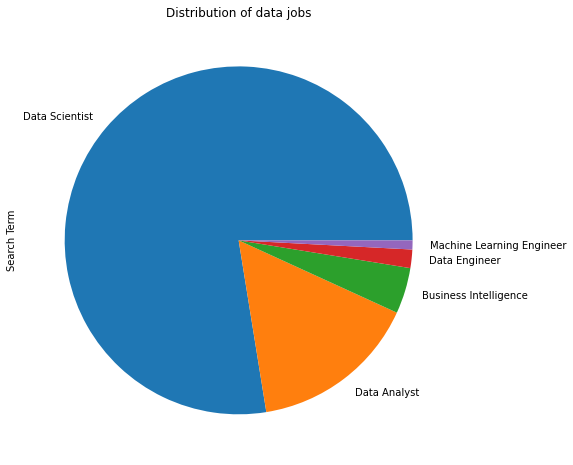

In [22]:
df['Search Term'].value_counts().plot(kind='pie',figsize=(8,8),title='Distribution of data jobs')

From the graph above, it is seen that most of the data jobs advertised are that of a Data Scientist and the least number of jobs advertised are that of a Machine Learning engineer

# Insight 6: Which sub-category of 'Data' jobs have the highest pay?

In [23]:
df['Salary'].value_counts()

Not Specified                                                                                        2883
HK$45K - 55K /month                                                                                    35
HK$25K - 35K /month                                                                                    27
HK$35K - 55K /month                                                                                    21
HK$35K - 45K /month                                                                                    21
                                                                                                     ... 
AI System Architect/ System Analyst/ Analyst Programmer/ Data Scientist/ Engineer (HK$35K - $80K)       1
Senior Business Analyst / BA (Ref. No.: 17522) (HK$28K to $50K)                                         1
Senior Application Manager (HK$70,000 – HK$120,000 per month) (Ref. No.: 24993)                         1
Head of Data Migration (HK$70K – 120K) (Ref. N

In [24]:
df.groupby(['Search Term'])['Salary'].max()

Search Term
Business Intelligence                                            Not Specified
Data Analyst                 System Analyst / Analyst Programmer-AML (Banki...
Data Engineer                                                    Not Specified
Data Scientist               Senior Technical Support (Financial Institutio...
Machine Learning Engineer                                        Not Specified
Name: Salary, dtype: object

In [25]:
temp_df=df[df['Salary']!='Not Specified']

In [26]:
temp_df.groupby(['Search Term'])['Salary'].max()

Search Term
Business Intelligence                                    HK$90K - 120K /month 
Data Analyst                 System Analyst / Analyst Programmer-AML (Banki...
Data Engineer                                             HK$45K - 55K /month 
Data Scientist               Senior Technical Support (Financial Institutio...
Machine Learning Engineer                                 HK$35K - 55K /month 
Name: Salary, dtype: object

Business intelligence engineer jobs seem to have the highest mentioned pay. However, please note that there are a significant number ofjobs where the salary has not been mentioned.

# Insight 7: How many years of experience do most jobs posted require?

In [30]:
df.groupby(['Years of Experience'])['Years of Experience'].count().sort_values()

Years of Experience
9.5        1
0.5        1
3.5        2
8.5        2
2.5        3
5.5        3
13.0       3
6.5        3
10.5       4
9.0        4
1.5        4
4.5        5
15.0       8
7.5       12
12.0      13
7.0       41
10.0      79
6.0       97
8.0      109
4.0      124
1.0      323
5.0      380
2.0      445
3.0      471
0.0     1074
Name: Years of Experience, dtype: int64

Most of the jobs are fresher openings which do not require years of work experience

# Insight 8: Find out the distribution of the work agreement of the jobs posted?

<AxesSubplot:ylabel='Job Type'>

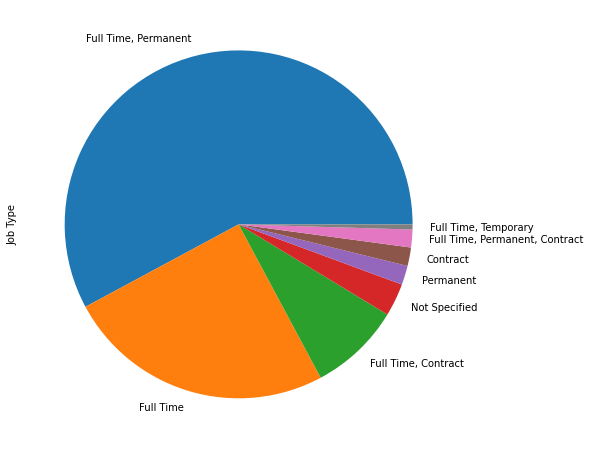

In [35]:
df['Job Type'].value_counts()[:8].plot(kind='pie',figsize=(8,8))

Most jobs belong to the full time, permamnent category and the least number of jobs belong to the full time, temporary category

# Insight 9: For the Data Science, Data Analyst, ML Enginner, and BI roles, what is the average work experience requirement for these roles?

In [29]:
df.groupby(['Search Term'])['Years of Experience'].mean().sort_values(ascending=False)

Search Term
Business Intelligence        3.386861
Data Engineer                3.363636
Data Scientist               2.496988
Data Analyst                 2.415339
Machine Learning Engineer    2.333333
Name: Years of Experience, dtype: float64

On average, the Business Intelligence and Data Engineer roles require slightly more experience than the other roles. This kind of explains why BI roles are paid slightly higher

# Insight 10: What is the source/sources of these job postings?

In [49]:
df.groupby(['Data Source'])['Data Source'].count()

Data Source
CTGoodJobs      96
JobsDB        3115
Name: Data Source, dtype: int64

All jobs have been extracted from these 2 portals with the majority of them having been scrapped from the JobsDB portal.

# Insight 11: Show the top 5 companies posting jobs

In [30]:
df['Company'].value_counts().head().sort_values(ascending=False)

IT Solutions Limited.                                                                  43
Robert Walters (HK)                                                                    40
Hong Kong Applied Science and Technology Research Institute Company Limited (ASTRI)    37
Manpower Services (Hong Kong) Limited                                                  31
Talent Fields Hong Kong Company Limited                                                29
Name: Company, dtype: int64

# Insight 12: What is the career level distribution of jobs?

In [35]:
df.groupby(['Career Level','Search Term']).size()

Career Level  Search Term              
Entry         Business Intelligence          51
              Data Analyst                  214
              Data Engineer                  22
              Data Scientist               1033
              Machine Learning Engineer       8
Middle        Business Intelligence          38
              Data Analyst                  147
              Data Engineer                  18
              Data Scientist                785
              Machine Learning Engineer      12
Senior        Business Intelligence          48
              Data Analyst                  141
              Data Engineer                  15
              Data Scientist                672
              Machine Learning Engineer       7
dtype: int64

For each career level, i.e., Entry, Middle, and Senior, Data Scientists seem to be the most prominent role and Machine Learning Engineers the least prominent

# Insight 13: What are the minimum qualifications needed for most jobs?

In [36]:
df['Qualification'].value_counts()

Degree                 1984
Not Specified           679
Non-Degree Tertiary     441
Matriculated             32
Postgraduate             30
School Certificate       23
(N/A)                    20
:                         1
Primary                   1
Name: Qualification, dtype: int64

<AxesSubplot:>

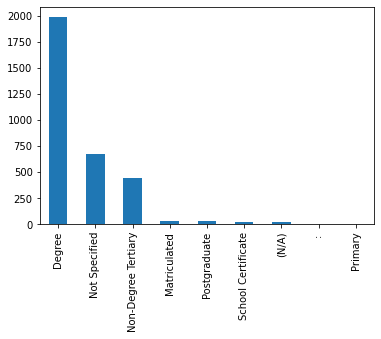

In [37]:
df['Qualification'].value_counts().plot(kind='bar')

Most jobs require a Degree at the bare minimum

# Insight 14: Salary Ranges across jobs

<AxesSubplot:>

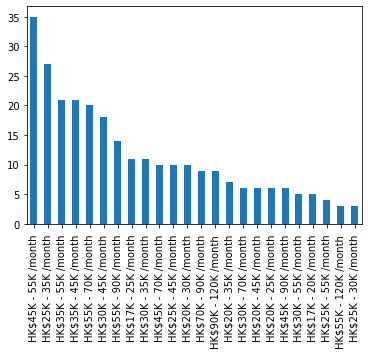

In [66]:
df['Salary'].value_counts()[1:25].plot(kind='bar')

Maximum number of jobs are within the HK$45K - 55K /month